In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data1 = pd.read_csv('titanic.csv')  # Update with your dataset file path

# Data Exploration
print(data1.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [18]:
print(data1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [19]:
print(data1.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [20]:

# Data Preprocessing
# Handle missing values
data1.dropna(inplace=True)  # This is just an example, handle missing values as appropriate


In [21]:
# Feature Engineering
# Create new features, encode categorical variables, etc.
data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1
data1['IsAlone'] = data1['FamilySize'].apply(lambda x: 1 if x == 1 else 0)


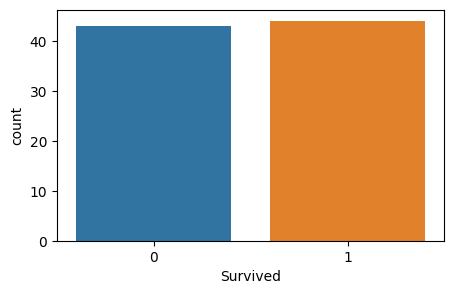

In [62]:
# Data Visualization
plt.figure(figsize=(5, 3))
sns.countplot(x='Survived', data=data1)
plt.show()

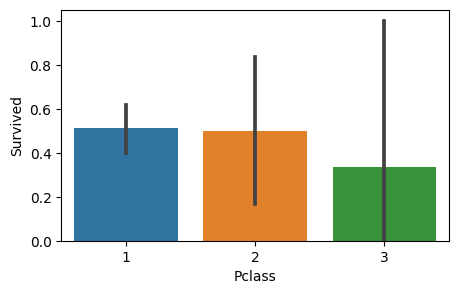

In [64]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Pclass', y='Survived', data=data1)
plt.show()

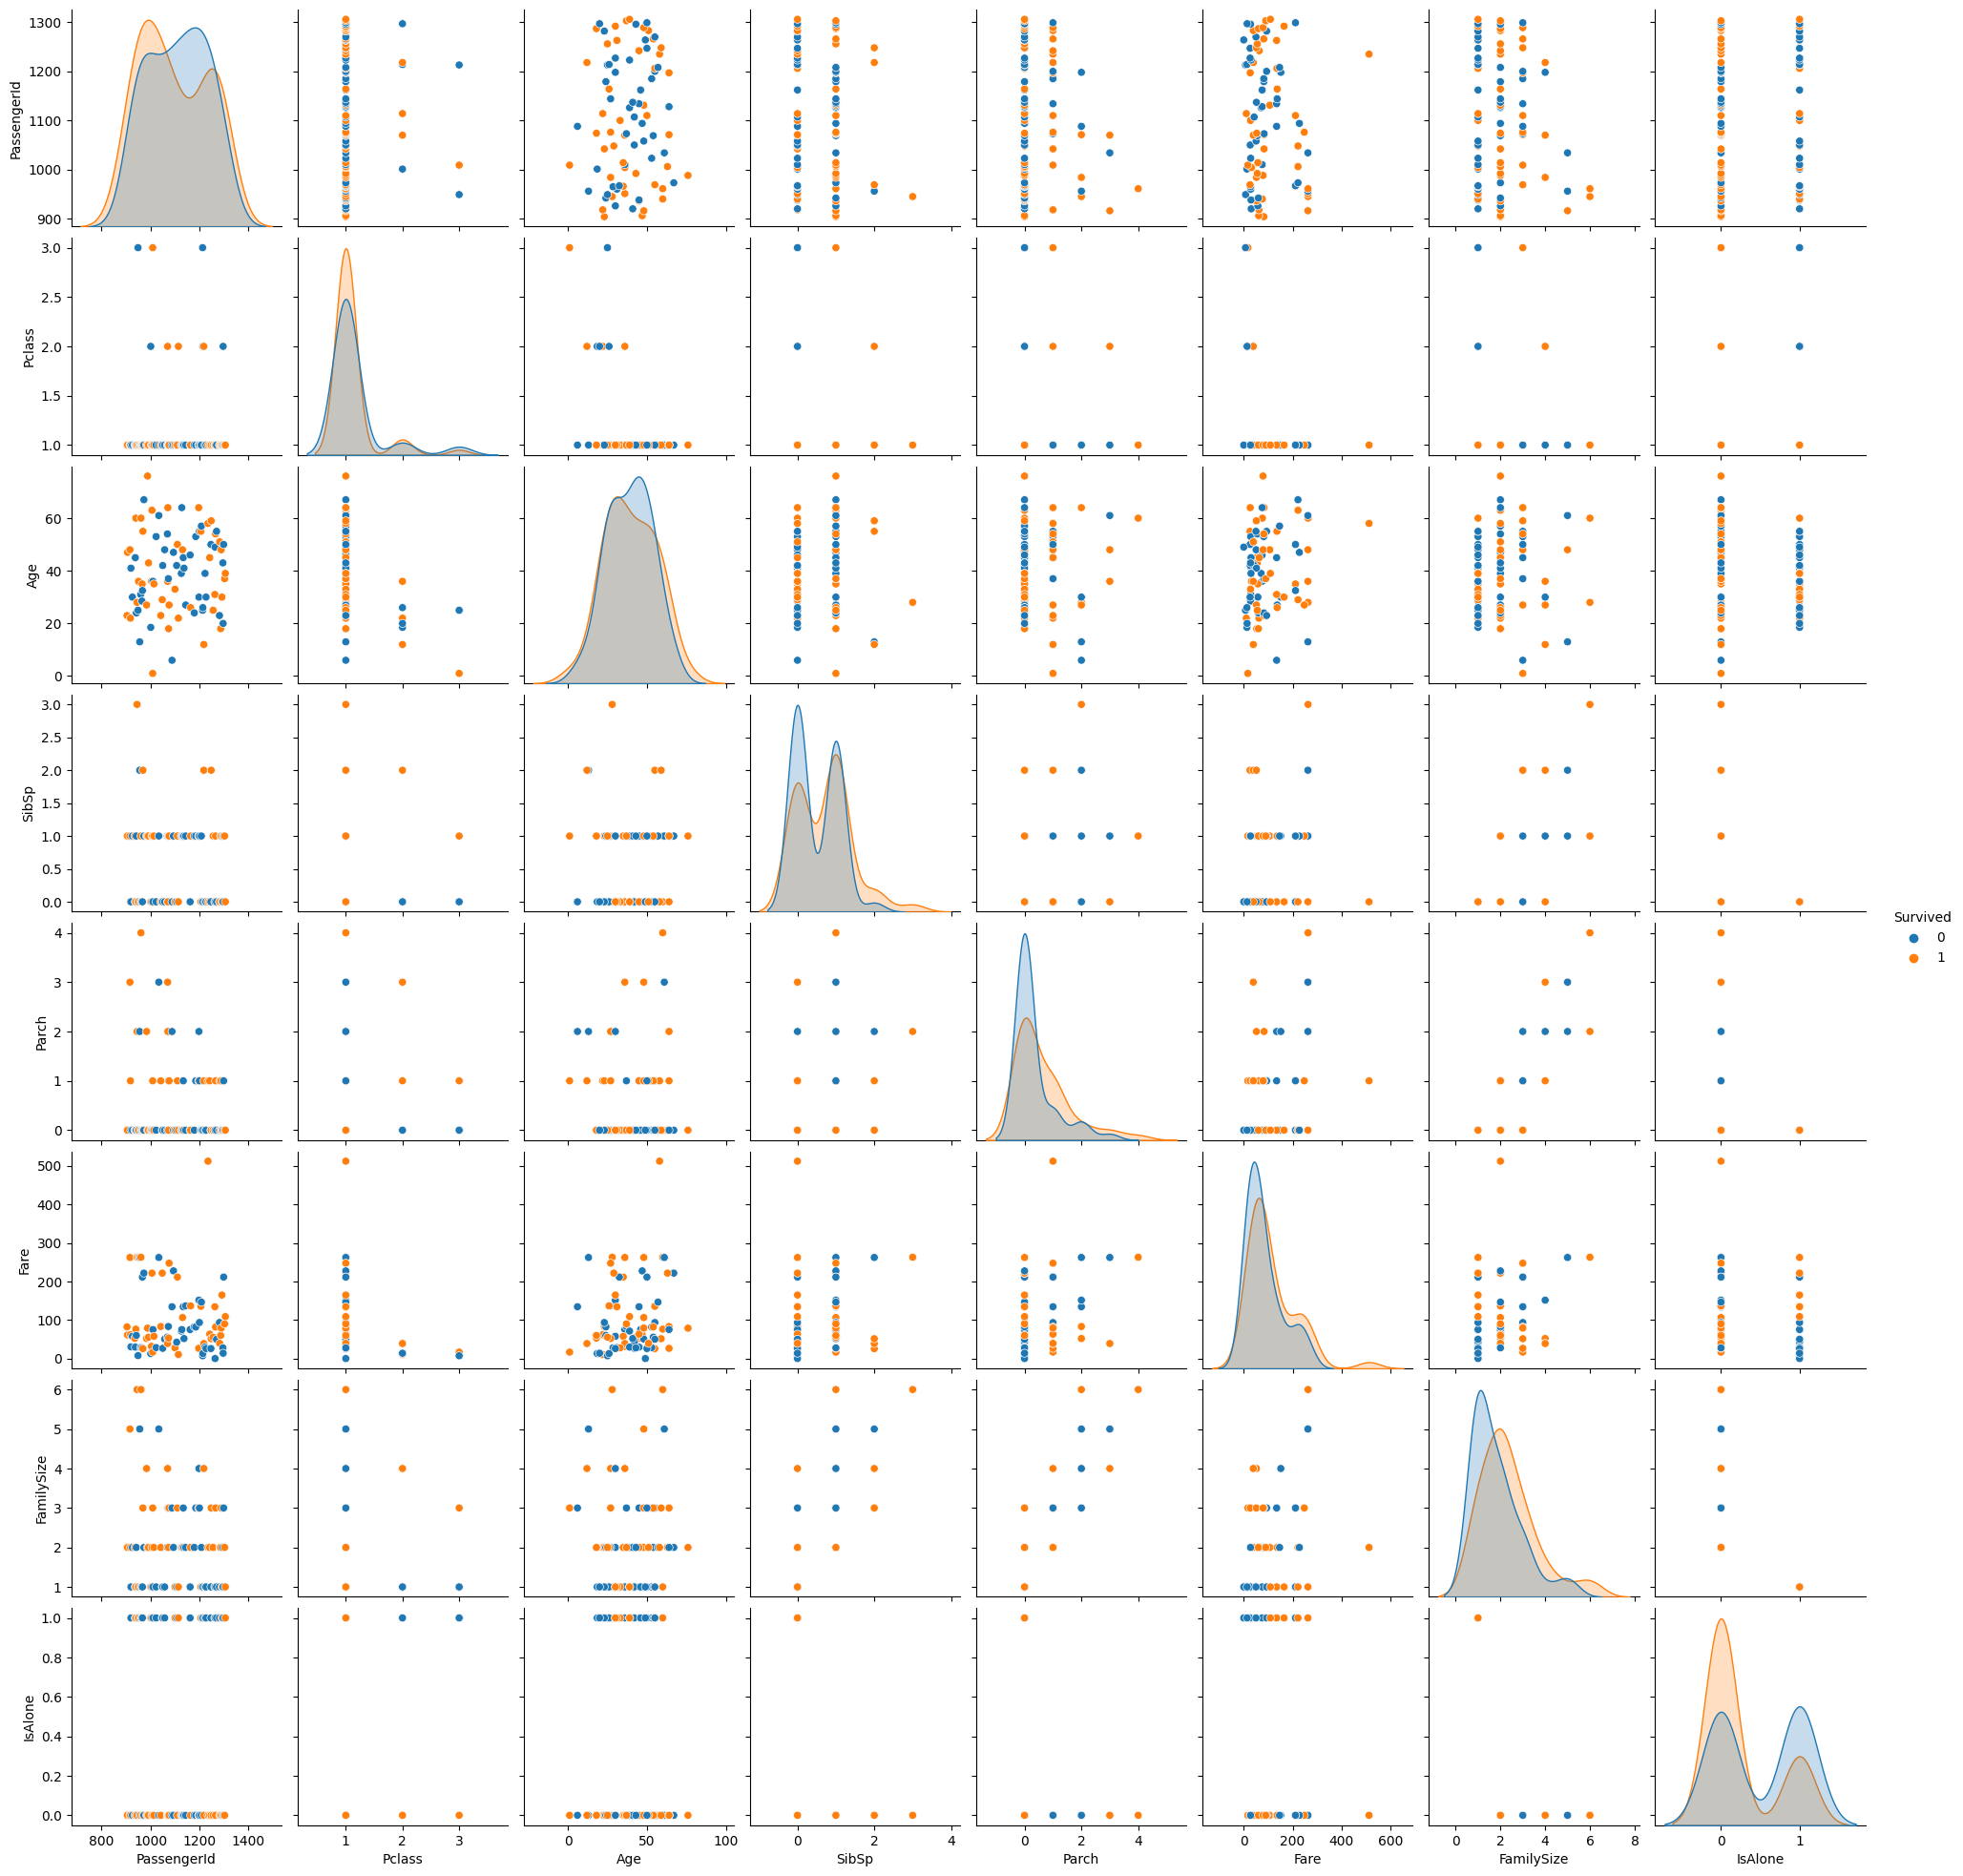

In [24]:
sns.pairplot(data1, hue='Survived')
plt.show()

In [25]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,2,0
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,2,0
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,5,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,2,0
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,1,1


In [37]:
# Model Building
# Prepare data for modeling
X = data1.drop(['Name','Cabin','Embarked'	,'FamilySize',	'IsAlone', 'Ticket'], axis=1)
X.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
12,904,1,1,female,23.0,1,0,82.2667
14,906,1,1,female,47.0,1,0,61.1750
24,916,1,1,female,48.0,1,3,262.3750
26,918,1,1,female,22.0,0,1,61.9792
28,920,0,1,male,41.0,0,0,30.5000


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform one-hot encoding on the 'Sex' column
data_encoded = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Separate features (X) and target (y)
X = data_encoded.drop(['Survived'], axis=1)
y = data_encoded['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
print(X_train_scaled[:5])


[[ 0.55753027 -0.29138576 -0.94242252  0.7309634  -0.57294631  0.70047452
  -1.01459931]
 [ 1.38744731 -0.29138576 -0.5994523  -1.00822538 -0.57294631  0.66822614
  -1.01459931]
 [-1.24481481  4.17652921 -1.01101656 -1.00822538 -0.57294631 -1.12657308
   0.98561076]
 [-0.62447278 -0.29138576  0.90961667 -1.00822538 -0.57294631 -0.83156666
   0.98561076]
 [-0.19693976 -0.29138576 -1.49117487  0.7309634  -0.57294631 -0.48350154
  -1.01459931]]


In [39]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
# Build a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)



LogisticRegression()

In [41]:
# Predictions
y_pred = model.predict(X_test_scaled)



In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
